## Objective

We will be examining monthly lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for 2018. The dataset includes five columns:  

|date|number_of_strikes|center_point_geom|longitude|latitude|
|---|---|---|---|---|  

The objective is to inspect the data and validate the quality of its contents. We will check for:
  
* Null values
* Missing dates
* A plausible range of daily lightning strikes in a location
* A geographical range that aligns with expectation

In [18]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import eda_functions
from eda_functions import *

In [13]:
df = pd.read_csv('/home/gato/Scripts/DS/DataIntoInsights/data/Data_week_3/eda_input_validation_joining_dataset1.csv')

In [14]:
df.head()

,date,number_of_strikes,center_point_geom,longitude,latitude
0,2018-01-03,194,POINT(-75 27),-75.0,27.0
1,2018-01-03,41,POINT(-78.4 29),-78.4,29.0
2,2018-01-03,33,POINT(-73.9 27),-73.9,27.0
3,2018-01-03,38,POINT(-73.8 27),-73.8,27.0
4,2018-01-03,92,POINT(-79 28),-79.0,28.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   date               object 
 1   number_of_strikes  int64  
 2   center_point_geom  object 
 3   longitude          float64
 4   latitude           float64
dtypes: float64(2), int64(1), object(2)
memory usage: 129.7+ MB


In [16]:
## Change and display data type
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date                 datetime64[ns]
number_of_strikes             int64
center_point_geom            object
longitude                   float64
latitude                    float64
dtype: object

In [19]:
dir(eda_functions)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'feature_observe',
 'filler_of_the_nans',
 'histogramas',
 'invalid_df',
 'kurt_skew',
 'math',
 'miss_df',
 'np',
 'pd',
 'plt',
 'readableNumbers',
 'siftdatatype',
 'sns',
 'stats']

In [7]:
help(filler_of_the_nans)

Help on function filler_of_the_nans in module basicEda:

filler_of_the_nans(technique, df, list_to_fill)
    Fill in nans of a fill_list from a pandas df,
    the fill list should be defined by the technique to use. 
    The options are mean, median, mode, interpolation and None.
    
    Args:
        technique (list): a technique to use, from the list
        df(pd.DataFrame): a pdDataFrame.
        fill_list (pd.Series): pd.Series or list of Series with
        missing values.



In [20]:
help(miss_df)

Help on function miss_df in module eda_functions:

miss_df(dataframe: pandas.core.frame.DataFrame)
    Take a pandas df as argument, returns another one
    with  basic information about missing data
    Args:
        df(pd.DataFrame): a pdDataFrame.



In [21]:
miss_df(df)

,Total,Percent
date,0,0.0
number_of_strikes,0,0.0
center_point_geom,0,0.0
longitude,0,0.0
latitude,0,0.0


In [10]:
# Note


In [11]:
df.describe(include='all', datetime_is_numeric=True)

,date,number_of_strikes,center_point_geom,longitude,latitude
count,3401012,3.401012e+06,3401012,3.401012e+06,3.401012e+06
unique,NaN,NaN,170855,NaN,NaN
top,NaN,NaN,POINT(-81.5 22.5),NaN,NaN
freq,NaN,NaN,108,NaN,NaN
mean,2018-07-13 03:32:02.018504960,1.311403e+01,NaN,-9.081778e+01,3.374688e+01
min,2018-01-01 00:00:00,1.000000e+00,NaN,-1.418000e+02,1.660000e+01
25%,2018-06-04 00:00:00,2.000000e+00,NaN,-1.008000e+02,2.760000e+01
50%,2018-07-18 00:00:00,4.000000e+00,NaN,-9.070000e+01,3.350000e+01
75%,2018-08-24 00:00:00,1.200000e+01,NaN,-8.130000e+01,3.970000e+01
max,2018-12-31 00:00:00,2.211000e+03,NaN,-4.320000e+01,5.170000e+01


In [12]:
df.describe(include='all')

/tmp/ipykernel_21228/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,date,number_of_strikes,center_point_geom,longitude,latitude
count,3401012,3.401012e+06,3401012,3.401012e+06,3.401012e+06
unique,357,NaN,170855,NaN,NaN
top,2018-09-01 00:00:00,NaN,POINT(-81.5 22.5),NaN,NaN
freq,31773,NaN,108,NaN,NaN
first,2018-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2018-12-31 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,1.311403e+01,NaN,-9.081778e+01,3.374688e+01
std,NaN,3.212099e+01,NaN,1.296593e+01,7.838555e+00
min,NaN,1.000000e+00,NaN,-1.418000e+02,1.660000e+01
25%,NaN,2.000000e+00,NaN,-1.008000e+02,2.760000e+01


We need a way to easily determine which dates are missing. We can do this by comparing all of the actual dates in 2018 to the dates we have in our `date` column. The function `pd.date_range()` will create a datetime index of all dates between a start and end date (inclusive) that we'll give as arguments. This is a very useful function that can be used for more than just days. For more information about `pd.date_range()`, refer to the [pandas date_range() function documentation](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html). 

Once we have the datetime index object of all dates in 2018, we'll compare its contents to the dates we have in the `date` column. The `index.difference()` method is used on index objects. Its argument is an index or array that you want to compare with the one the method is being applied to. It returns the set difference of the two indices&mdash;the values that are in the original index but not in the one given in the argument. 

In [13]:
## finding missing dates
## with a calendar index

full_date_range = pd.date_range(start = '2018-01-01', end = '2018-12-31')
full_date_range.difference(df['date'])

DatetimeIndex(['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', freq=None)

In [14]:
## 4 june 2 in sept 2 in Dec.
## why was this?


This finding would be something to investigate or to question the owner of the data, to find out the reason why. Working as a data professional in a business setting, you would want to repeat the same process for the other two years as well. Given that the number of missing days is relatively small, you can complete your analysis by making a note of the missing days in the presentation. This will ensure that anyone who analyzes your visualization or presentation will know that the data depicted doesn't include those missing dates.

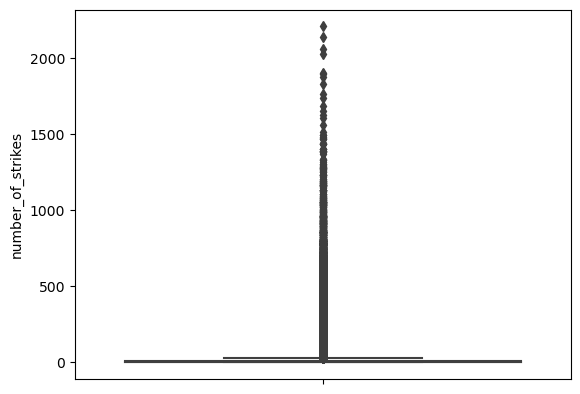

In [15]:
sns.boxplot(y = df['number_of_strikes']);

In [23]:
## most of the days less than 5 strikes and some 2000 very skeewed.

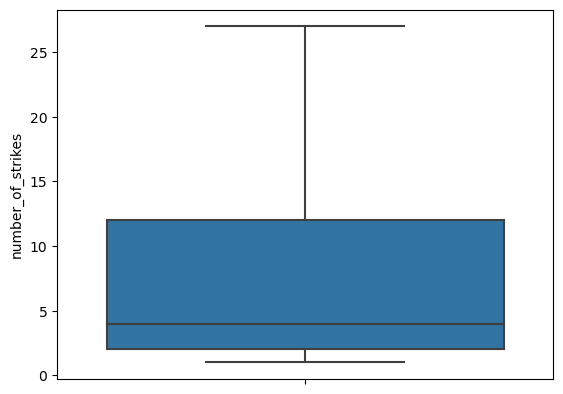

In [24]:
## lets take the outliers off,
sns.boxplot(y = df['number_of_strikes'], showfliers=False);

Finally, we'll create a scatterplot of all the geographical coordinates that had lightning strikes in 2018. We'll plot the points on a map to make sure the points in the data are relevant and not in unexpected locations. Because this can be a computationally intensive process, we'll prevent redundant computation by dropping rows that have the same values in their `latitude` and `longitude` columns. We can do this because the purpose here is to examine locations that had lightning strikes, but it doesn't matter how many strikes they had or when.

In [20]:
# plot data in map to maek sure is from the USA
df_points = df[['latitude', 'longitude']].drop_duplicates()
df_points.head()

,latitude,longitude
0,27.0,-75.0
1,29.0,-78.4
2,27.0,-73.9
3,27.0,-73.8
4,28.0,-79.0


In [22]:
#poi = px.scatter_geo(df_points, lat = 'latitude', lon = 'longitude')
#poi.show()